In [131]:
import requests
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt

In [132]:
mainImage=Image.open(requests.get("https://media.sproutsocial.com/uploads/2017/02/10x-featured-social-media-image-size.png",stream=True).raw)
logo=Image.open(requests.get("https://pianalytix.com/wp-content/uploads/2020/05/cropped-pianalytiX-full-logo-square-2-209x52.png",stream=True).raw)

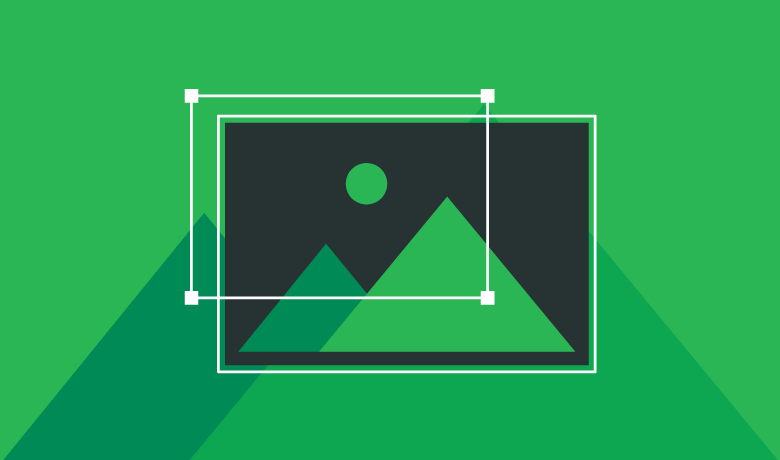

In [133]:
mainImage

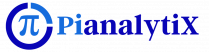

In [134]:
logo

In [135]:
logo=logo.convert("RGB")
mainImage=mainImage.convert("RGB")
logo=np.array(logo)
mainImage=np.array(mainImage)
print(logo.shape)
print(mainImage.shape)

(52, 209, 3)
(460, 780, 3)


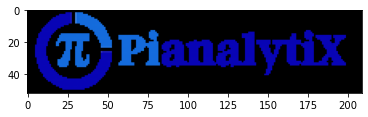

In [136]:
plt.imshow(logo)

In [137]:
main_h,main_w,_=mainImage.shape
logo_h,logo_w,_=logo.shape

In [138]:
topLeft=int(main_w/2-logo_w/2),int(main_h/2-logo_h/2)
rightBottom=int(main_w/2+logo_w/2),int(main_h/2+logo_h/2)
roi=mainImage[topLeft[1]:rightBottom[1],topLeft[0]:rightBottom[0],:]

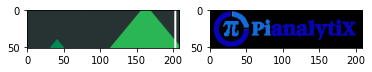

In [139]:
plt.subplot(121)
plt.imshow(roi)
plt.subplot(122)
plt.imshow(logo)
plt.show()

In [140]:
addedImage=cv2.addWeighted(roi,1,logo,1,0)

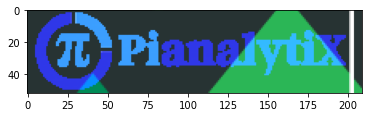

In [141]:
plt.imshow(addedImage)

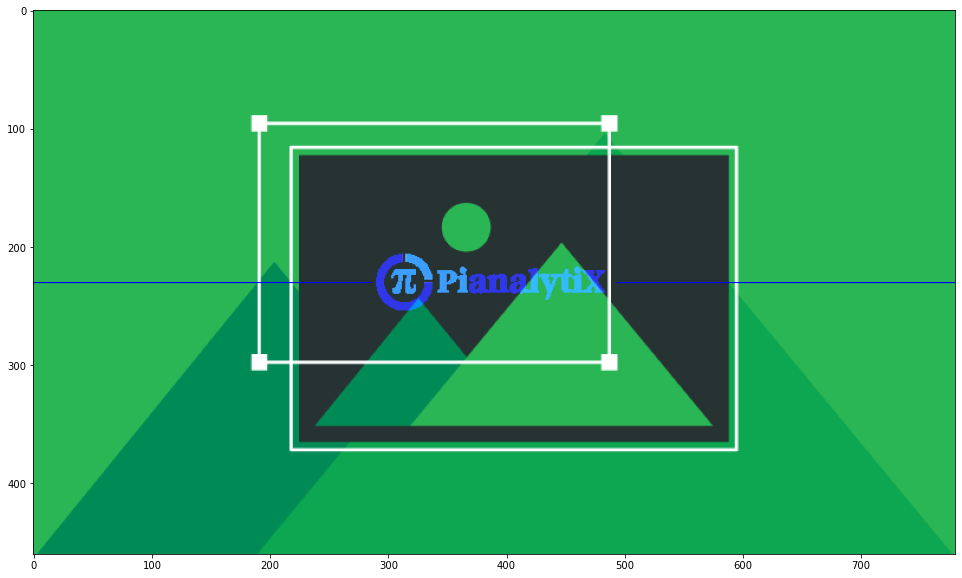

In [158]:
img=mainImage.copy()
img[topLeft[1]:rightBottom[1],topLeft[0]:rightBottom[0],:]=addedImage
cv2.line(img,(0,int(main_h/2)),(int(main_w/2)-int(logo_w/2),int(main_h/2)),(0,0,255),1)
cv2.line(img,(int((main_w/2)+(logo_w/2)),int(main_h/2)),(main_w,int(main_h/2)),(0,0,255),1)
plt.figure(figsize=(20,10))
plt.imshow(img)

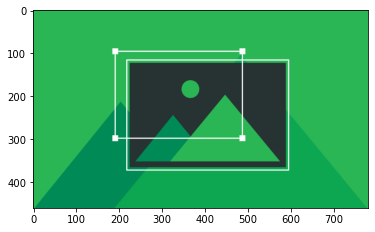

In [159]:
plt.imshow(mainImage)

In [167]:
textImage=cv2.putText(mainImage.copy(),"Negi",(main_w-100,main_h-20),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),2)

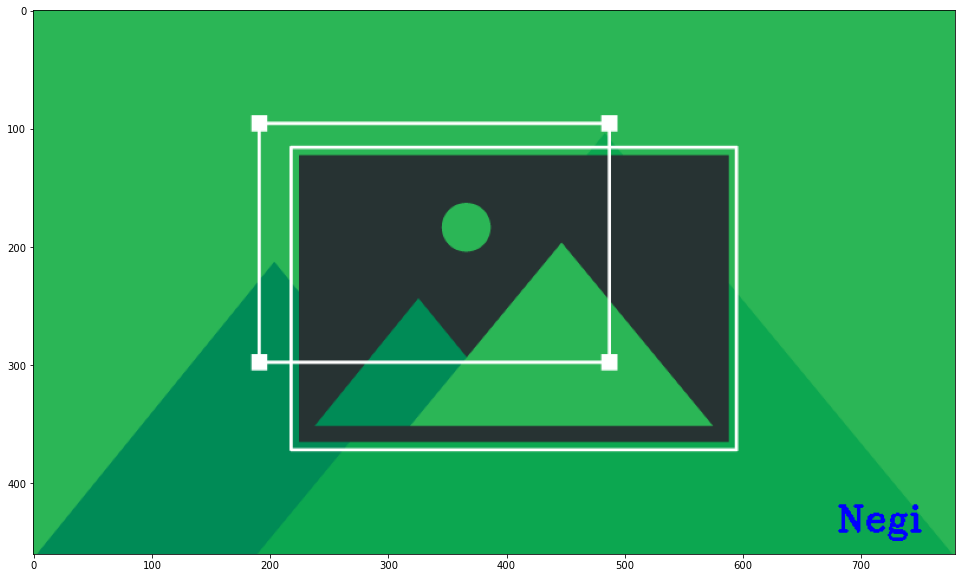

In [168]:
plt.figure(figsize=(20,10))
plt.imshow(textImage)